In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WIPRO) is a leading global information technology,
 consulting and business process services company. We harness the power of cognitive computing, hyper-automation,
 robotics, cloud, analytics and emerging technologies to help our clients adapt to the digital world and make them successful. 
 A company recognized globally for its comprehensive portfolio of services, strong commitment to sustainability and
 good corporate citizenship, we have over 220,000 dedicated employees serving clients across six continents.
 Together, we discover ideas and connect the dots to build a better and a bold new future.


**Content**   <br>
Though a little late in the day, the world is waking up to the deleterious effect of fossil fuels on our environment. As the doomsday clock ticks away, human beings are turning to renewable energy to avert a possible apocalypse. Fortunately, the sun is a well-spring of clean energy. Taking the cue, Wipro, in association with MachineHack, has designed a forecasting challenge to optimise solar power generation using ML models.

A solar power generation company wants to optimize solar power production and needs the prediction model to predict the Clearsky Global Horizontal Irradiance(GHI). The data is ten years at an interval of every 30 mins with the following data points:

<b> <u> 
['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Fill Flag', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed'] </b> </u>



In [92]:
#!pip install bayesian-optimization

In [93]:
#!pip install keras-tuner

In [94]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [95]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [97]:
# Importing all datasets
train = pd.read_csv("/content/train.csv")
train.head(4)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0


In [98]:
# Importing all datasets
test = pd.read_csv("/content/test.csv")
test.head(4)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN


In [99]:
test['Clearsky DHI'] = 0

In [100]:
test['Clearsky DNI'] = 0

In [101]:
test['Clearsky GHI'] = 0

In [102]:
test.head(4)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,0,0,0
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,0,0,0
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,0,0,0
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,0,0,0


In [103]:
test.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
dtype: int64

In [104]:
import seaborn as sns

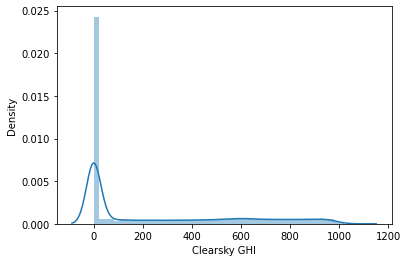

In [105]:
sns.distplot(train['Clearsky GHI'])

In [106]:
train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

In [107]:
# Checking for outliers in the continuous variables
num_train_data = train[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']]


In [108]:

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_train_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
90%,2017.000000,11.000000,28.000000,21.000000,30.000000,146.000000,851.000000,804.000000,7.000000,23.000000,29.000000,1010.000000,100.000000,143.080000,5.018000,319.900000,4.000000,0.000000
95%,2018.000000,12.000000,29.000000,22.000000,30.000000,171.000000,895.000000,902.000000,8.000000,23.400000,31.600000,1010.000000,100.000000,153.970000,5.354000,337.500000,4.700000,3.000000
99%,2018.000000,12.000000,31.000000,23.000000,30.000000,224.000000,957.000000,975.000000,8.000000,24.300000,35.000000,1020.000000,100.000000,166.780000,5.883000,354.800000,6.200000,7.000000


In [109]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    5.000
Month                   6.000
Day                    15.000
Hour                   11.500
Minute                 30.000
Clearsky DHI          103.000
Clearsky DNI          736.000
Clearsky GHI          535.000
Cloud Type              6.000
Dew Point              13.000
Temperature            13.000
Pressure               10.000
Relative Humidity      32.360
Solar Zenith Angle     66.610
Precipitable Water      2.689
Wind Direction        174.600
Wind Speed              1.700
Fill Flag               0.000
dtype: float64


In [110]:
print(train.quantile(0.10))
print(train.quantile(0.90))

Year                  2010.000
Month                    2.000
Day                      4.000
Hour                     2.000
Minute                   0.000
Clearsky DHI             0.000
Clearsky DNI             0.000
Clearsky GHI             0.000
Cloud Type               0.000
Dew Point                1.000
Temperature              5.000
Pressure              1000.000
Relative Humidity       49.740
Solar Zenith Angle      36.000
Precipitable Water       0.825
Wind Direction          53.000
Wind Speed               0.900
Fill Flag                0.000
Name: 0.1, dtype: float64
Year                  2017.000
Month                   11.000
Day                     28.000
Hour                    21.000
Minute                  30.000
Clearsky DHI           146.000
Clearsky DNI           851.000
Clearsky GHI           804.000
Cloud Type               7.000
Dew Point               23.000
Temperature             29.000
Pressure              1010.000
Relative Humidity      100.000
Solar Zenith 

In [111]:
train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(train.shape)

(160021, 18)


### Anamaly Detection

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [113]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train)

IsolationForest(contamination=0.1)

In [114]:
train['anomaly']=model.predict(train)

In [115]:
anomaly=train.loc[train['anomaly']==-1]

In [116]:
train = train[train['anomaly']==1]

In [117]:
train = train.drop(columns="anomaly")

In [118]:
train.shape

(144019, 18)

In [119]:
## Feature Selection

**Feature Selection - Using Lasso Regression**

In [120]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

In [122]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [121]:
X_train = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)

In [123]:
y_train = train[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]

In [124]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [57]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [125]:
selected_features = X_train.columns[(model.get_support())]

In [126]:
selected_features

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [127]:
train = train.drop(columns='Fill Flag')

In [128]:
test = test.drop(columns='Fill Flag')

In [129]:
X_train = train.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)

In [130]:
y_train = train[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]

In [131]:
X_test = test.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)

In [132]:
y_test = test[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]

In [133]:
print(X_train.shape,y_train.shape)

(144019, 14) (144019, 3)


In [134]:
print(X_test.shape,y_test.shape)

(17520, 14) (17520, 3)


In [135]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(train[selected_features])

In [136]:
X_train_scaled = pd.DataFrame(transformer.transform(X_train[selected_features]))
X_train_scaled.columns = X_train[selected_features].columns.tolist()
X_test_scaled = pd.DataFrame(transformer.transform(X_test[selected_features]))
X_test_scaled.columns = X_test[selected_features].columns.tolist()
X_train_scaled.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed
0,-1.0,-1.2,-1.0,-0.909091,-1.0,0.0,-1.333333,-1.250000,1.0,-0.350177,0.124943,-0.934032,0.874852,0.800000
1,-1.0,-1.2,-1.0,-0.909091,0.0,0.0,-1.250000,-1.250000,1.0,-0.174123,0.218232,-0.937524,0.874852,0.800000
2,-1.0,-1.2,-1.0,-0.363636,-1.0,0.0,-1.333333,-1.583333,1.0,0.009977,1.096332,-0.930927,-0.980427,0.266667
3,-1.0,-1.2,-1.0,-0.272727,-1.0,0.0,-1.416667,-1.666667,1.0,0.193756,0.944453,-0.925495,-0.942467,0.133333
4,-1.0,-1.2,-1.0,-0.272727,0.0,0.0,-1.416667,-1.666667,1.0,0.194078,0.851773,-0.923166,-0.942467,0.133333


In [137]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [138]:

from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras import Sequential # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense # import Dense from tensorflow.keras.layers
from numpy.random import seed # seed helps you to fix the randomness in the neural network. 
import tensorflow

In [139]:
from sklearn.model_selection import KFold

In [140]:
from tensorflow.keras.losses import mean_squared_error

In [141]:
from numpy.random import seed # seed helps you to fix the randomness in the neural network.

In [142]:
# Import packages
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [143]:
# Make scorer: MSE
mse = make_scorer(MSE, greater_is_better=False)

In [144]:

    # Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def nn_re_bo(neurons, activation, optimizer, batch_size, epochs, layers1, layers2, dropout, dropout_rate):
    optimizerL = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD', 'SGD']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'LeakyReLU']
        
    neurons = round(neurons)
    activation = activationL[floor(activation)]
    optimizer = optimizerL[floor(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_re_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=14, activation=activation))
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(3, activation='linear'))
        nn.compile(loss='mean_squared_error', optimizer=optimizer)
        return nn

    nn = KerasRegressor(build_fn=nn_re_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=123)
    scores =  cross_val_score(nn, X_train, y_train, cv=kfold).mean()
    score = ((scores*-1)**0.5)*-1
    return score

In [145]:
# Set paramaters
# Set hyperparameters spaces
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'batch_size':(200, 500),
    'epochs':(10, 20),
    'layers1':(1,3),
    'layers2':(1,3),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_re_bo, params_nn, random_state=123)
nn_bo.maximize(init_points=-9, n_iter=10)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        | -41.25    |  6.268    |  285.8    |  0.2269   |  0.1654   |  17.19    |  1.846    |  2.962    |  71.63    |  3.367    |
|  2        | -53.95    |  0.4273   |  406.3    |  0.7922   |  0.1338   |  15.58    |  2.939    |  1.549    |  78.79    |  4.941    |
|  3        | -344.0    |  4.807    |  284.9    |  0.6537   |  0.004567 |  17.41    |  2.957    |  1.505    |  71.11    |  3.374    |
|  4        | -349.5    |  4.008    |  220.1    |  0.6678   |  0.2293   |  13.47    |  2.118    |  1.91     |  47.11    |  2.928    |
|  5        | -53.47    |  0.05796  |  378.8    |  0.8438   |  0.1297   |  17.85    |  1.595    |  1.567    |  52.87    |  4.12     |
|  6        | -161.6    |  1.4      |  257.3    |  0.8349   | 

In [146]:
# Best hyperparameters
params_nn = nn_bo.max['params']

optimizerL = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD', 'SGD']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', 'LeakyReLU']

params_nn['neurons'] = round(params_nn['neurons'])
params_nn['activation'] = activationL[floor(params_nn['activation'])]
params_nn['optimizer'] = optimizerL[round(params_nn['optimizer'])]
params_nn['batch_size'] = round(params_nn['batch_size'])
params_nn['epochs'] = round(params_nn['epochs'])
params_nn['layers1'] = round(params_nn['layers1'])
params_nn['layers2'] = round(params_nn['layers2'])
params_nn

{'activation': 'LeakyReLU',
 'batch_size': 251,
 'dropout': 0.30171083763528883,
 'dropout_rate': 0.23345748839375755,
 'epochs': 19,
 'layers1': 2,
 'layers2': 1,
 'neurons': 78,
 'optimizer': 'Adamax'}

In [147]:
params_nn['neurons']

78

In [148]:
# Fitting the training data
def nn_re_fun():
    nn = Sequential()
    nn.add(Dense(params_nn['neurons'], input_dim=14, activation=params_nn['activation']))
    for i in range(params_nn['layers1']):
        nn.add(Dense(params_nn['neurons'], activation=params_nn['activation']))
    if params_nn['dropout'] > 0.5:
        nn.add(Dropout(params_nn['dropout_rate'], seed=123))
    for i in range(params_nn['layers2']):
        nn.add(Dense(params_nn['neurons'], activation=params_nn['activation']))
    nn.add(Dense(3, activation='linear'))
    nn.compile(loss='mean_squared_error', optimizer=params_nn['optimizer'], metrics=['mse'])
    return nn




In [149]:
nn_hyp = KerasRegressor(build_fn=nn_re_fun, epochs=params_nn['epochs'], batch_size=params_nn['batch_size'], verbose=0)

nn_hyp.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0)

# Predict the validation data
pred_nn = nn_hyp.predict(X_test)

# Compute RMSE
rmse_nn = MSE(y_test, pred_nn)**0.5


In [150]:
rmse_nn

372.20058316112807

In [151]:
MSE(y_test, pred_nn)

138533.2741054838

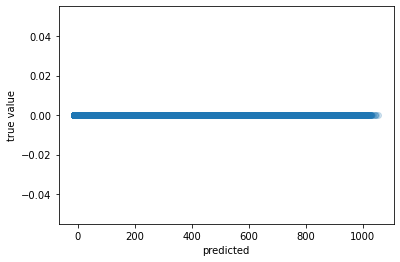

In [152]:
# Scatter plot true and predicted values
plt.scatter(pred_nn, y_test, alpha=0.2)
plt.xlabel('predicted')
plt.ylabel('true value')

plt.show()

In [153]:
train_error =  np.abs(y_test - pred_nn)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [154]:
pred_nn

array([[ 5.5564320e-01, -7.9800224e+00,  3.2965188e+00],
       [ 1.7642206e-01, -8.7095480e+00,  3.9384191e+00],
       [ 6.1941195e-01, -8.4091482e+00,  3.7489097e+00],
       ...,
       [ 1.3551808e+01,  1.8132231e+02,  3.4192833e+01],
       [-1.2953722e+00, -2.9194274e+00, -2.8352783e+00],
       [-1.0033449e+00, -8.5353193e+00,  1.6429838e+00]], dtype=float32)

In [155]:
prediction = pd.DataFrame(pred_nn)

In [156]:
prediction

,0,1,2
0,0.555643,-7.980022,3.296519
1,0.176422,-8.709548,3.938419
2,0.619412,-8.409148,3.748910
3,0.419025,-9.170046,4.481726
4,0.547952,-8.799377,4.057145
...,...,...,...
17515,48.736660,633.020020,195.185104
17516,37.164783,457.351990,110.511024
17517,13.551808,181.322311,34.192833
17518,-1.295372,-2.919427,-2.835278


In [157]:
prediction.rename(columns = {0:'Clearsky DHI', 1: 'Clearsky DNI', 2: 'Clearsky GHI'}, inplace = True)

In [158]:
prediction.to_csv("/content/output_ann.csv")

In [159]:
prediction.head(4)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.555643,-7.980022,3.296519
1,0.176422,-8.709548,3.938419
2,0.619412,-8.409148,3.748910
3,0.419025,-9.170046,4.481726
